We are going to apply the algorithm on a data set of Samsung shares in the stock market to
determine how they are grouped using k-means.

Import the libraries.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn import preprocessing


Load the data we are going to work with. Carry out a pre-treatment of the data:
1. Eliminate the NaN type values.
2. Normalize the values, this time scaling them with the min_max function.

In [73]:

# Load data, Eliminate NaN values, Normalize values (scale with min_max function)

df = pd.read_excel('Samsung_Exercise.xlsx')

df = df.dropna()
df = df.reset_index(drop=True)

min_max_scaler = preprocessing.MinMaxScaler()
df_scaling = min_max_scaler.fit_transform(df)

#convert value in Data feature
df_scaling = pd.DataFrame(df_scaling) #result has to be converted to df
df_scaling = df_scaling.rename(columns={0:'Close',1:'Volume'})

Visualize the data.

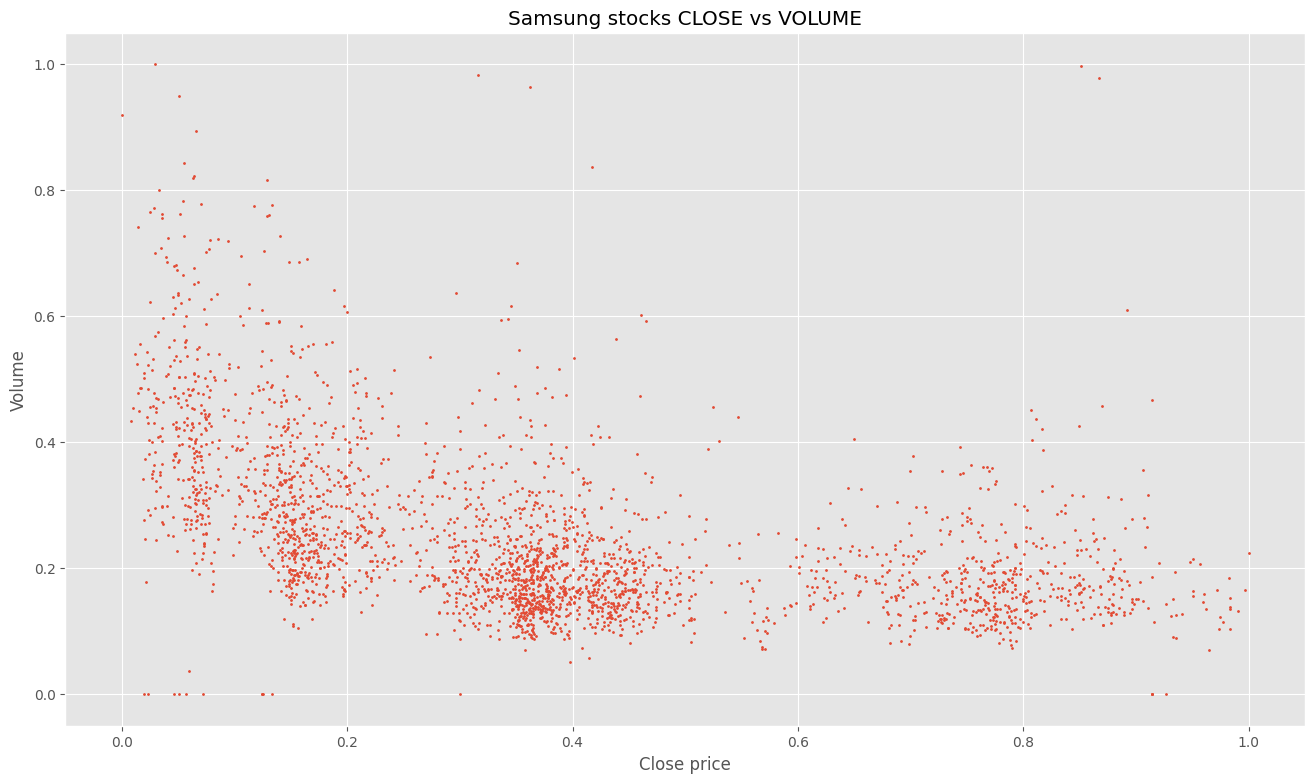

In [74]:
# VISUALIZE DATA
x = df_scaling['Close'].values
y = df_scaling['Volume'].values
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks CLOSE vs VOLUME')
plt.plot(x,y,'o',markersize=1)
plt.show()

We are now going to find the value of K by making a graph and trying to find the elbow that was
mentioned earlier.

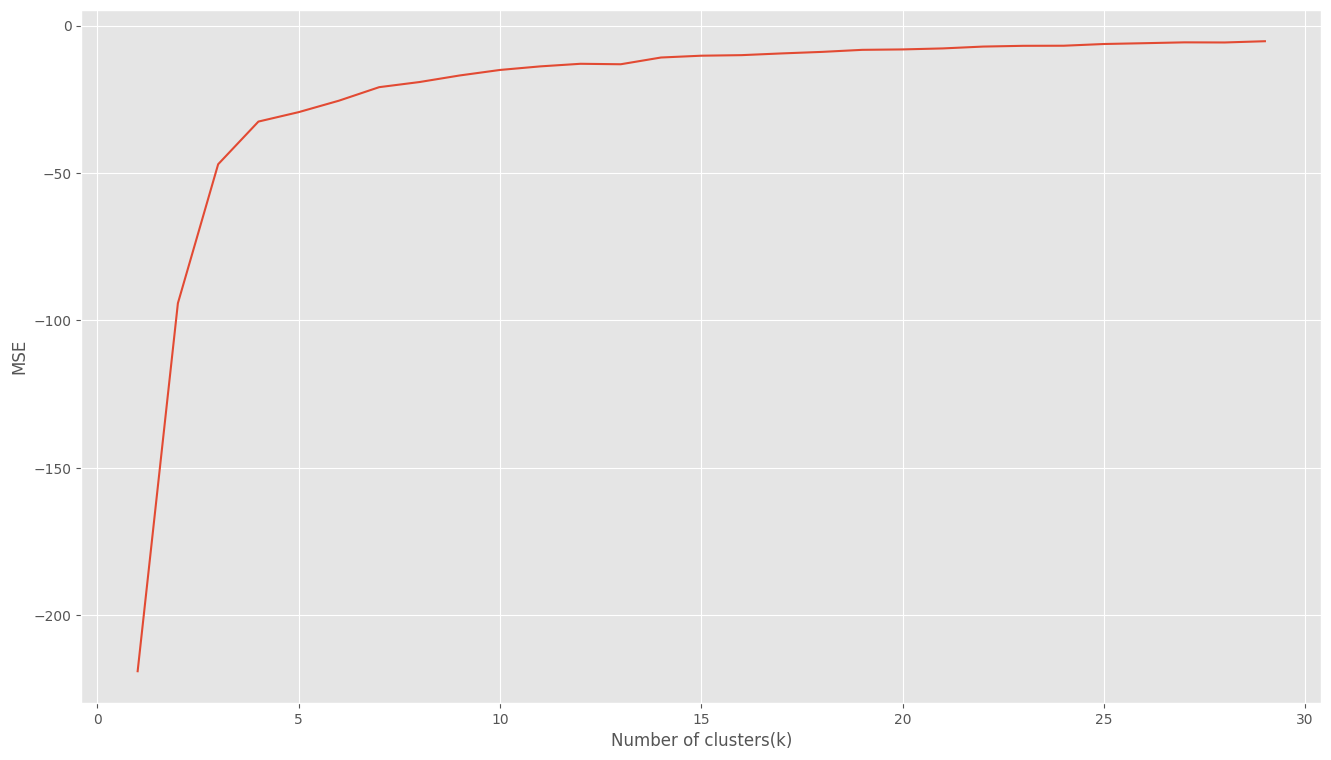

In [75]:
# FINDING K with elbow method
nc = range(1,30)
kmeans = [KMeans(n_clusters=i, n_init='auto') for i in nc]
score = [kmeans[i].fit(df_scaling).score(df_scaling) for i in range(len(kmeans))]
score
plt.xlabel('Number of clusters(k)')
plt.ylabel('MSE')
plt.plot(nc,score)
plt.show()

Apply the algorithm to the data and assign each value of the data set one of the clusters.

In [76]:
# Consider 5 a "good enough" number for K
kmeans = KMeans(n_clusters=5).fit(df_scaling)
centroids = kmeans.cluster_centers_
print(centroids)

#label dataframe
labels = kmeans.predict(df_scaling)
df['label'] = labels

[[0.77590771 0.18177724]
 [0.16828001 0.23918249]
 [0.3885773  0.18776705]
 [0.12099596 0.41025751]
 [0.13589535 0.67259458]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Representation of the classes obtained.

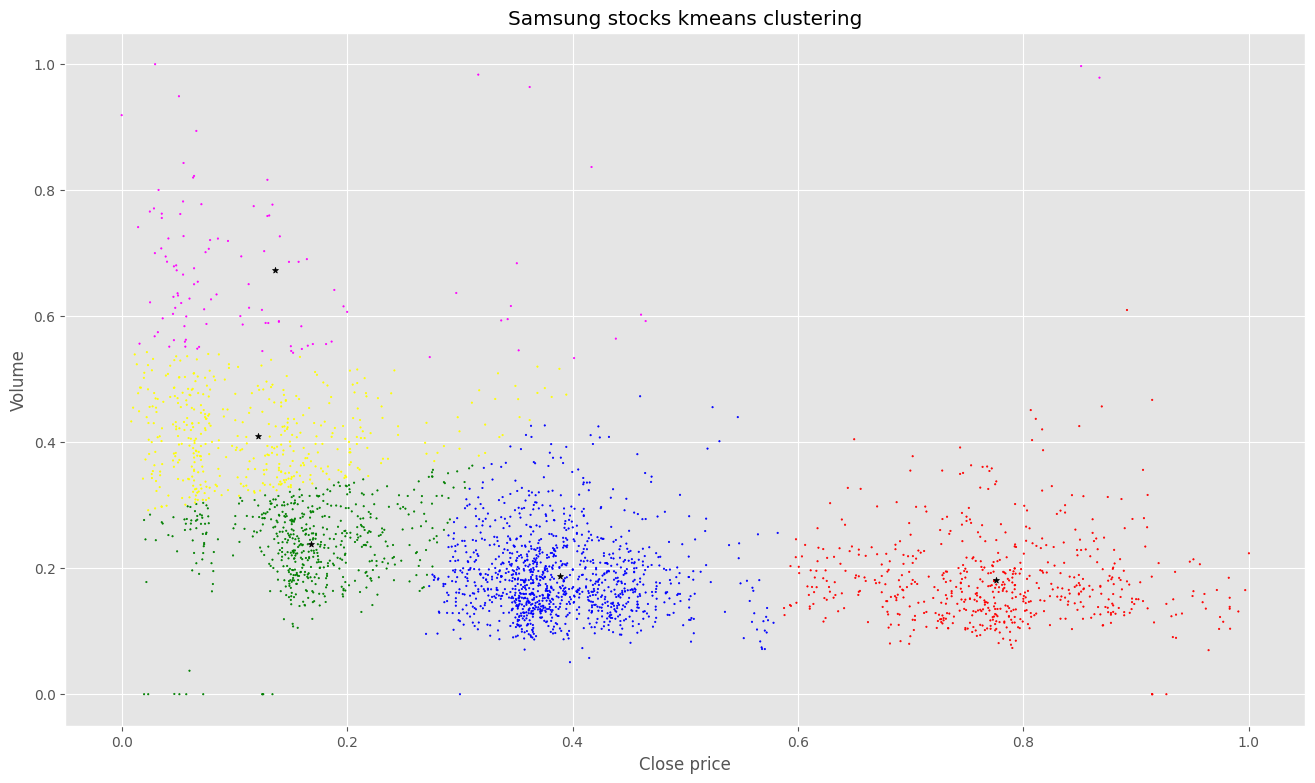

In [77]:
# Plot k-means clustering
colors = ['red','green','blue','yellow','fuchsia']
assign = []
for row in labels:
    assign.append(colors[row])

plt.scatter(x, y, c=assign, s=1)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='black', s=20)
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks kmeans clustering')
plt.show()